In [54]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [55]:
# Creating dataframe and displaying preview

data = pd.read_csv('application_data.csv')

print(f'''
Total Number Of Rows: {data.shape[0]}
Total Number Of Columns: {data.shape[1]}
\nColumns: {data.columns.tolist()}
\nSample Data: {data.head(5)}
\nDescriptive Statics: {data.describe()}
\nConcise Summary: {data.info()}
''')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

Total Number Of Rows: 307511
Total Number Of Columns: 122

Columns: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION

In [56]:
# For previous application

prev_data = pd.read_csv('previous_application.csv')

print(f'''
Total Number Of Rows: {prev_data.shape[0]}
Total Number Of Columns: {prev_data.shape[1]}
\nColumns: {prev_data.columns.tolist()}
\nSample Data: {prev_data.head(5)}
\nDescriptive Statics: {prev_data.describe()}
\nConcise Summary: {prev_data.info()}
''')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [57]:
# Handling missing values
# Calculate percentage of missing values per column

missing_values = data.isnull().sum() / len(data) * 100
print(missing_values[missing_values > 0])


AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OWN_CAR_AGE                   65.990810
OCCUPATION_TYPE               31.345545
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 67, dtype: float64


In [58]:
# For previous application

prev_missing_values = prev_data.isnull().sum() / len(prev_data) * 100
print(prev_missing_values[prev_missing_values > 0])

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64


In [59]:
# Drop columns with > 50% missing values

data_cleaned = data.loc[:, missing_values <= 50].copy()
print(f"Shape after dropping columns with > 50% missing values: {data_cleaned.shape}")


Shape after dropping columns with > 50% missing values: (307511, 81)


In [60]:
data_cleaned = data.loc[:, missing_values <= 50].copy()

In [61]:
# For previous application

prev_data_cleaned = prev_data.loc[:, prev_missing_values <= 50].copy()
print(f"Shape after dropping columns with > 50% missing values: {prev_data_cleaned.shape}")


Shape after dropping columns with > 50% missing values: (1670214, 33)


In [62]:
# Imputing remaining missing values (median for numerical columns, mode for categorixal columns)

# Why mean for numerical?: Median is less sensitive to outliers compared to the mean.

# Why mode for categorical?: Categorical columns don’t have a "central" value in the numerical sense, so the most frequent value (mode) is a natural choice.

data_cleaned.fillna({col: data_cleaned[col].median() for col in data_cleaned.select_dtypes(include=np.number).columns}, inplace=True)

data_cleaned.fillna({col: data_cleaned[col].mode()[0] for col in data_cleaned.select_dtypes(include='object').columns}, inplace=True)


print(tabulate(data_cleaned.sample(10), headers='keys', tablefmt='grid'))

+--------+--------------+----------+----------------------+---------------+----------------+-------------------+----------------+--------------------+------------------+---------------+-------------------+-------------------+----------------------+-------------------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+--------------+------------------+-------------------+--------------------+--------------+--------------+-------------------+-------------------+------------------------+-------------------------------+------------------------------+---------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+------------------------+----------------+----------------+-------------------------------+-----------------+-----------------------

In [63]:
# For previous application

prev_data_cleaned.fillna({col: prev_data_cleaned[col].median() for col in prev_data_cleaned.select_dtypes(include=np.number).columns}, inplace=True)

prev_data_cleaned.fillna({col: prev_data_cleaned[col].mode()[0] for col in prev_data_cleaned.select_dtypes(include='object').columns}, inplace=True)


print(tabulate(prev_data_cleaned.sample(10), headers='keys', tablefmt='grid'))

+---------+--------------+--------------+----------------------+---------------+-------------------+--------------+-------------------+------------------------------+---------------------------+-------------------------------+--------------------------+--------------------------+------------------------+-----------------+-----------------------+----------------------+-------------------+--------------------+-----------------------+------------------+---------------------+-------------------------+--------------------+------------------------+---------------+--------------------+--------------------------------+----------------------+------------------+-----------------------------+-----------------+--------------------+-----------------------------+
|         |   SK_ID_PREV |   SK_ID_CURR | NAME_CONTRACT_TYPE   |   AMT_ANNUITY |   AMT_APPLICATION |   AMT_CREDIT |   AMT_GOODS_PRICE | WEEKDAY_APPR_PROCESS_START   |   HOUR_APPR_PROCESS_START | FLAG_LAST_APPL_PER_CONTRACT   |   NFLAG_LAST_

In [64]:
# Before removing unnecessary columns
print("Application Column Count:", data_cleaned.shape[1])
print("Application:", data_cleaned.columns.tolist())
print("Prev_Application Column Number:", prev_data_cleaned.shape[1])
print("Prev_Application:", prev_data_cleaned.columns.tolist())

Application Column Count: 81
Application: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', '

In [65]:

application_columns_to_drop = [
    'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
    'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
    'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
] + [col for col in data.columns if col.startswith('FLAG_DOCUMENT_')]


prev_application_columns_to_drop = [
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
    'NAME_SELLER_INDUSTRY', 'CHANNEL_TYPE', 'NAME_PORTFOLIO', 'CODE_REJECT_REASON'
]

# Dropping columns from Application
application_data_cleaned = data_cleaned.drop(columns=application_columns_to_drop, errors='ignore')
print(f"Application Data Shape after dropping columns: {application_data_cleaned.shape}")

# Dropping columns from Previous Application
prev_application_data_cleaned = prev_data_cleaned.drop(columns=prev_application_columns_to_drop, errors='ignore')
print(f"Previous Application Data Shape after dropping columns: {prev_application_data_cleaned.shape}")


Application Data Shape after dropping columns: (307511, 58)
Previous Application Data Shape after dropping columns: (1670214, 28)


In [66]:
# After removing unnecessary columns

print("Application Column Number:", application_data_cleaned.shape[1])
print("Application:", application_data_cleaned.columns.tolist())
print("Prev_Application Column Number:", prev_application_data_cleaned.shape[1])
print("Prev_Application:", prev_application_data_cleaned.columns.tolist())

Application Column Number: 58
Application: ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 

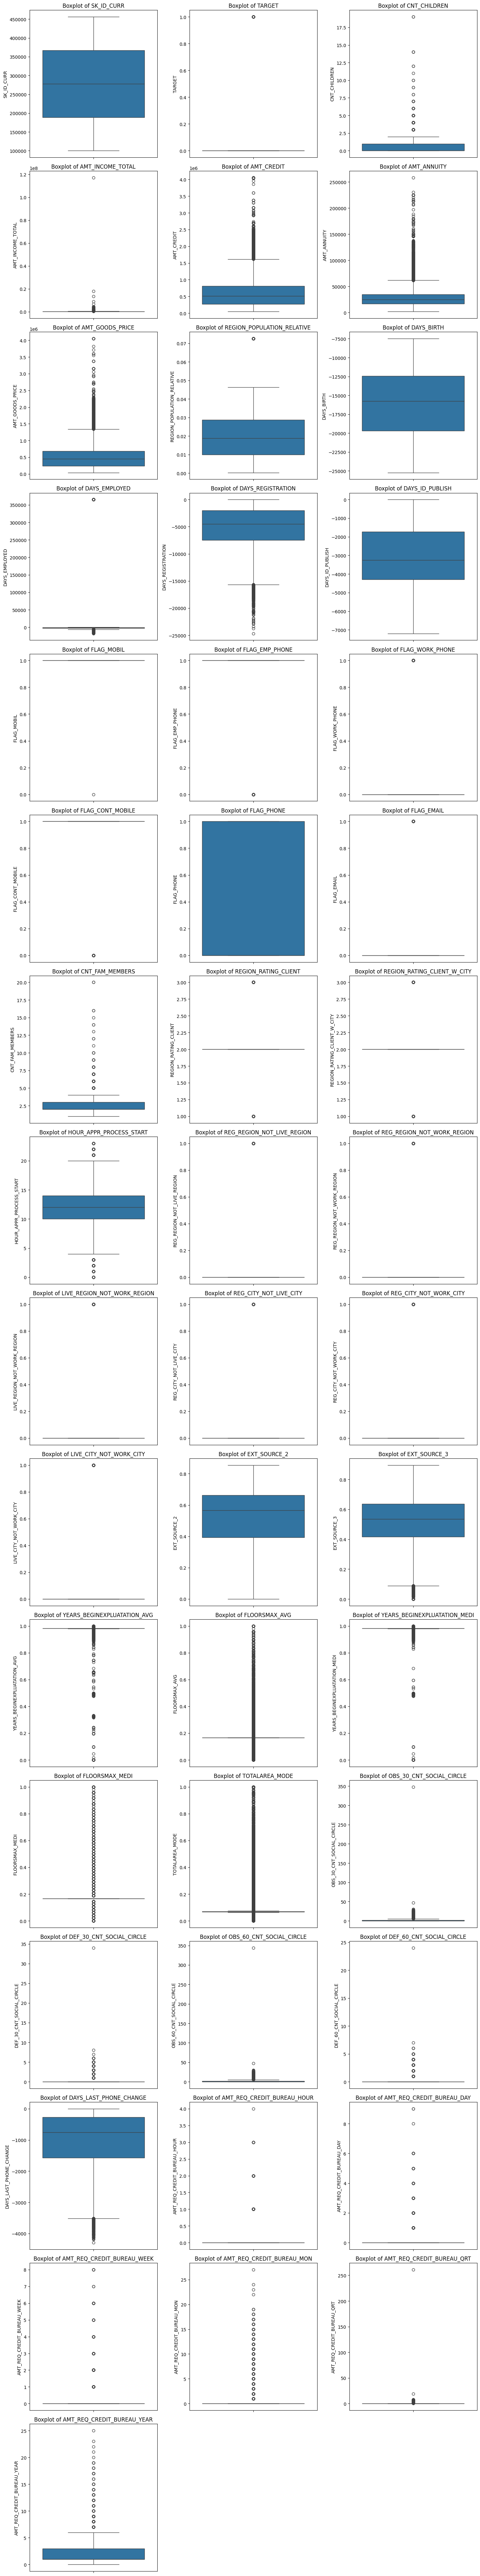

In [67]:
# Identify outliers in all columns using boxplot

numeric_columns = application_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numeric_columns)
n_rows = (num_cols + 2) // 3
plt.figure(figsize=(15, 5 * n_rows))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, 3, index)
    sns.boxplot(data=application_data_cleaned, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [68]:
# Remove all outliers from all columns

'''
numeric_columns = application_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    application_data_cleaned = remove_outliers(application_data_cleaned, column)

print("Data shape after removing outliers:", application_data_cleaned.shape)
'''


'\nnumeric_columns = application_data_cleaned.select_dtypes(include=[\'float64\', \'int64\']).columns\n\n# Using IQR method\ndef remove_outliers(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    \n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\nfor column in numeric_columns:\n    application_data_cleaned = remove_outliers(application_data_cleaned, column)\n\nprint("Data shape after removing outliers:", application_data_cleaned.shape)\n'

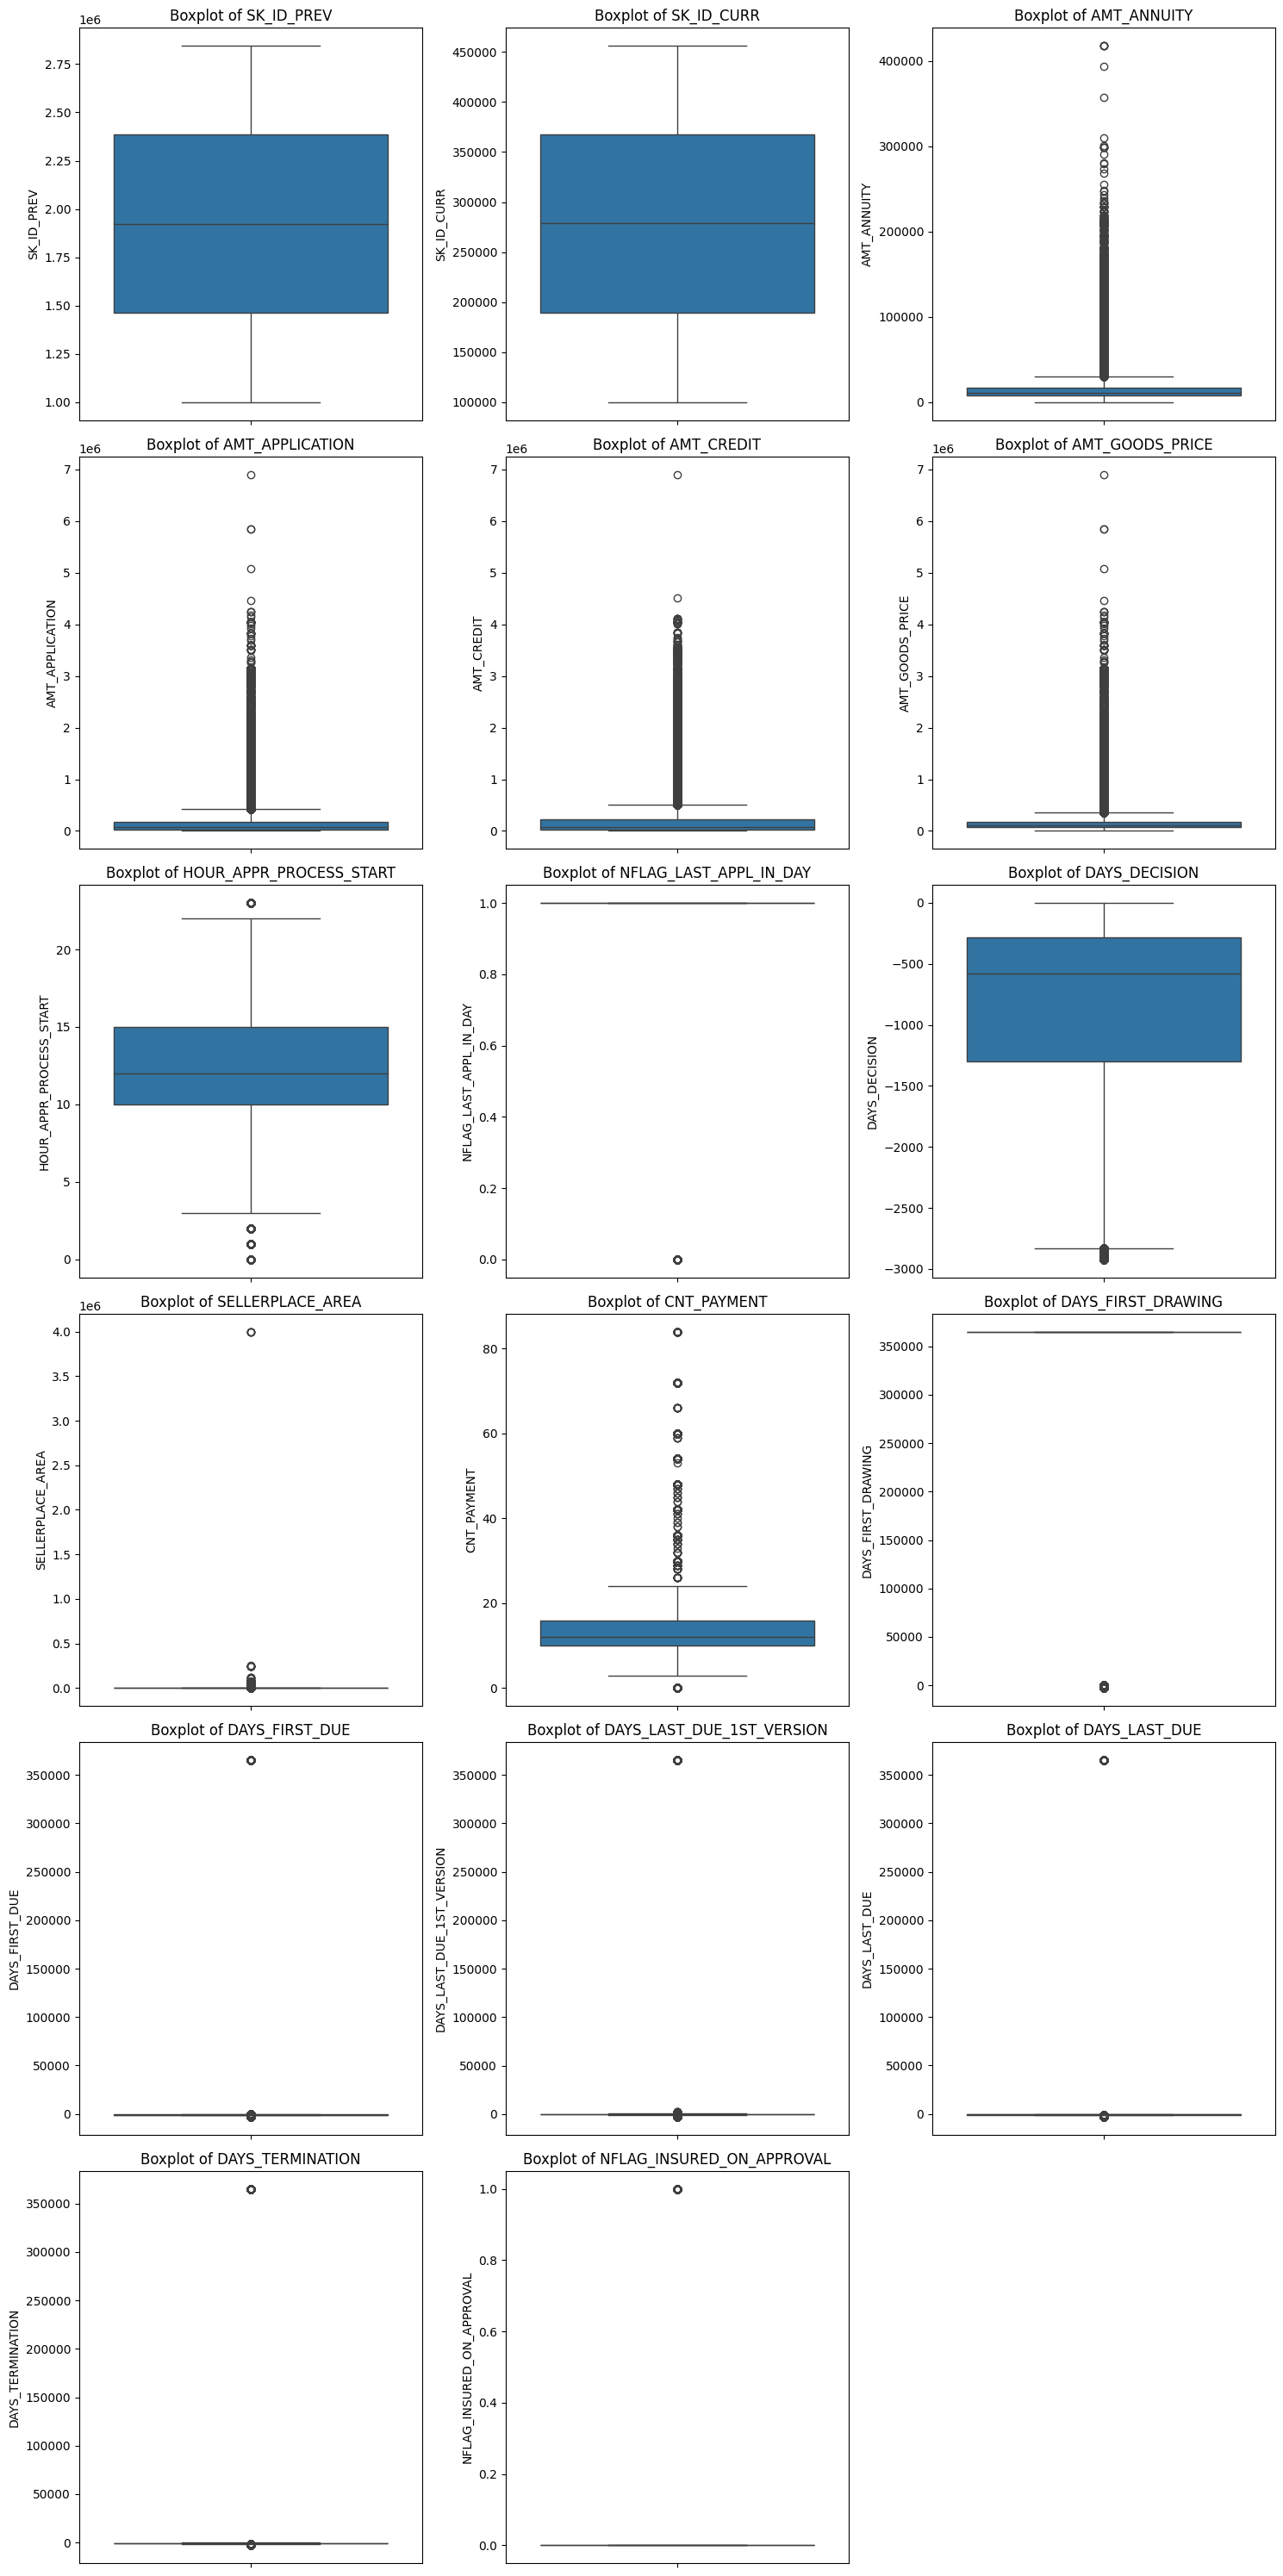

In [69]:
# Identify outliers (for prev_application_data_cleaned)

numeric_columns = prev_application_data_cleaned.select_dtypes(include=['float64', 'int64']).columns

num_cols = len(numeric_columns)
n_rows = (num_cols + 2) // 3
plt.figure(figsize=(15, 5 * n_rows))

for index, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, 3, index)
    sns.boxplot(data=prev_application_data_cleaned, y=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [70]:
# Removing outliers for prev_application_cleaned_data

'''
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for column in numeric_columns:
    prev_application_data_cleaned = remove_outliers(prev_application_data_cleaned, column)

print("Data shape after removing outliers:", prev_application_data_cleaned.shape)
'''

'\ndef remove_outliers(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    \n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    \n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\nfor column in numeric_columns:\n    prev_application_data_cleaned = remove_outliers(prev_application_data_cleaned, column)\n\nprint("Data shape after removing outliers:", prev_application_data_cleaned.shape)\n'

In [71]:
# Calculate imbalance ratio

target_counts = application_data_cleaned['TARGET'].value_counts(normalize=True)
print("Target variable imbalance ratio:")
print(target_counts)

# Target = 0 (no default), 0.91 means 90% rows belongs to class 0
# Target = 1 (default), 0.08 means 8 % rows belows to class 1
# Serious Imbalance!

Target variable imbalance ratio:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


In [72]:
# SteCorrelation analysis

# Only numeric columns
numerical_data = application_data_cleaned.select_dtypes(include='number')

correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                              SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                      1.000000 -0.002108     -0.001129   
TARGET                         -0.002108  1.000000      0.019187   
CNT_CHILDREN                   -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL               -0.001820 -0.003982      0.012882   
AMT_CREDIT                     -0.000343 -0.030369      0.002145   
AMT_ANNUITY                    -0.000431 -0.012815      0.021377   
AMT_GOODS_PRICE                -0.000258 -0.039623     -0.001856   
REGION_POPULATION_RELATIVE      0.000849 -0.037227     -0.025573   
DAYS_BIRTH                     -0.001500  0.078239      0.330938   
DAYS_EMPLOYED                   0.001366 -0.044932     -0.239818   
DAYS_REGISTRATION              -0.000973  0.041975      0.183395   
DAYS_ID_PUBLISH                -0.000384  0.051457     -0.028019   
FLAG_MOBIL                      0.002804  0.000534      0.001041   
FLAG_EMP_PHONE                 -0.001337  0.0459

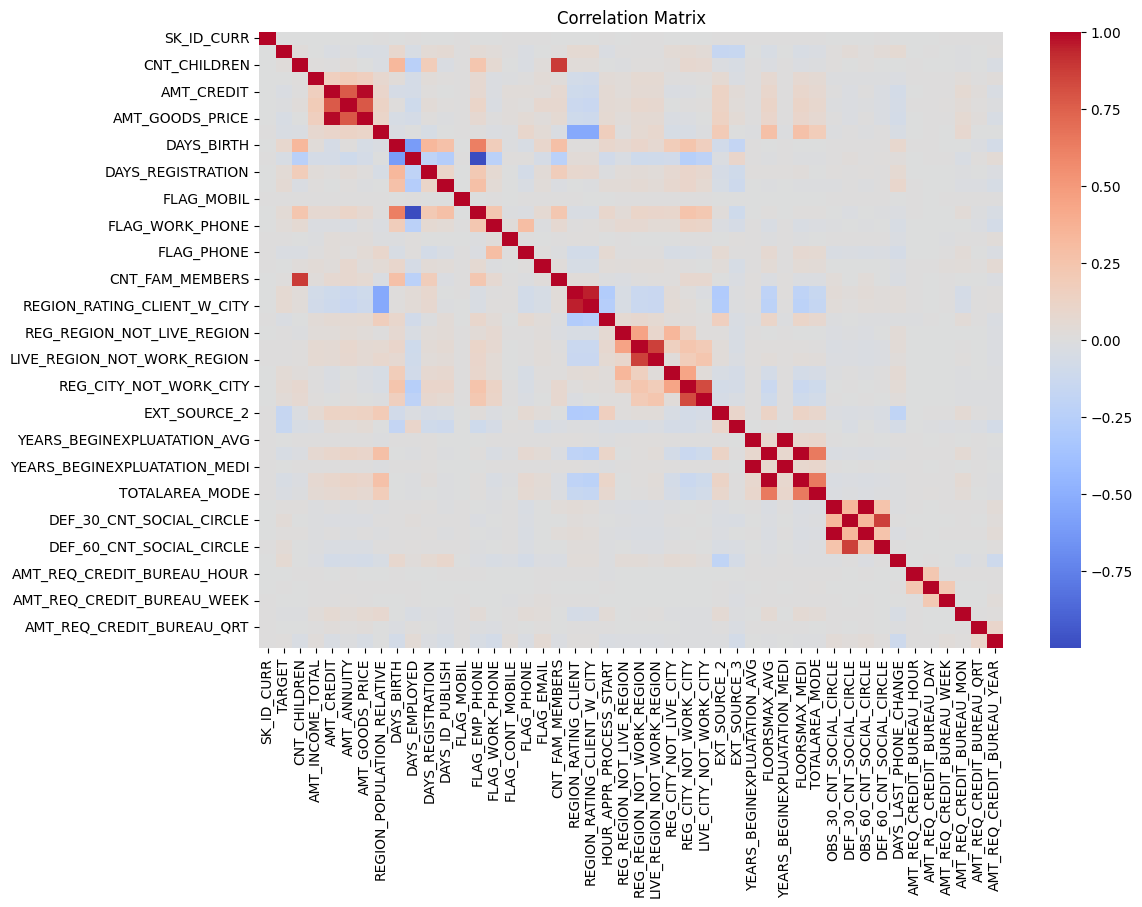

In [73]:
# Visualize the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [74]:
# Find top 10 correlations excluding the target variable

top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Top 10 correlations:")
print(top_correlations.head(10))

Top 10 correlations:
SK_ID_CURR                   SK_ID_CURR                      1.000000
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        0.998491
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997260
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.993838
AMT_GOODS_PRICE              AMT_CREDIT                      0.986734
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT            0.950842
CNT_FAM_MEMBERS              CNT_CHILDREN                    0.879160
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION     0.860627
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE        0.860556
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY         0.825575
dtype: float64


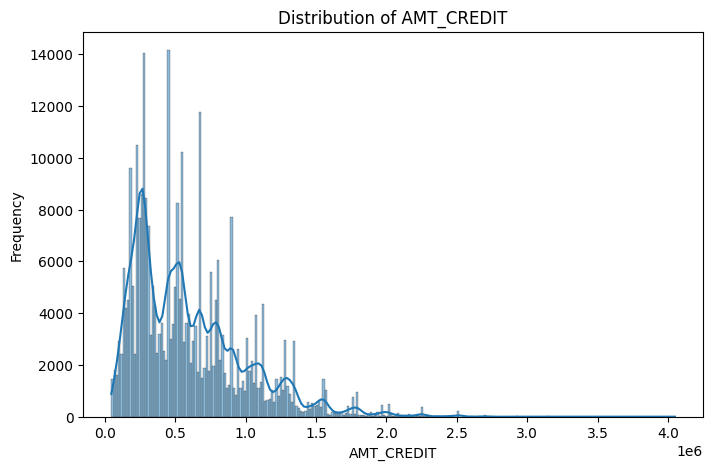

In [75]:
# Univariate and bivariate analysis

# Univariate analysis of a variable ('AMT_CREDIT')

plt.figure(figsize=(8, 5))
sns.histplot(data=application_data_cleaned, x='AMT_CREDIT', kde=True)
plt.title('Distribution of AMT_CREDIT')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.show()

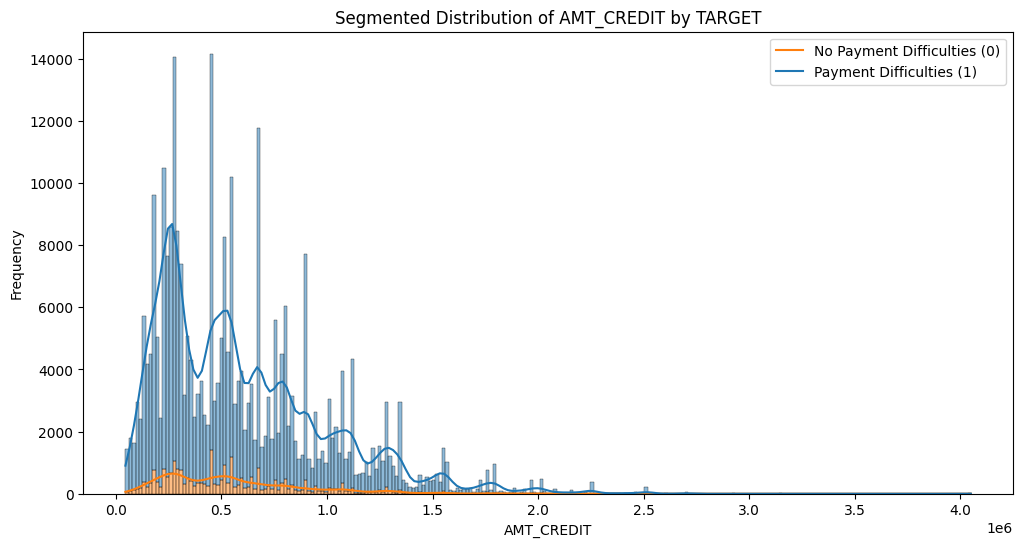

In [76]:
# Segmented Univariate Analysis: Distribution of 'AMT_CREDIT' for each target group
plt.figure(figsize=(12, 6))
sns.histplot(data=application_data_cleaned, x='AMT_CREDIT', hue='TARGET', kde=True, multiple='stack')
plt.title('Segmented Distribution of AMT_CREDIT by TARGET')
plt.xlabel('AMT_CREDIT')
plt.ylabel('Frequency')
plt.legend(['No Payment Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()

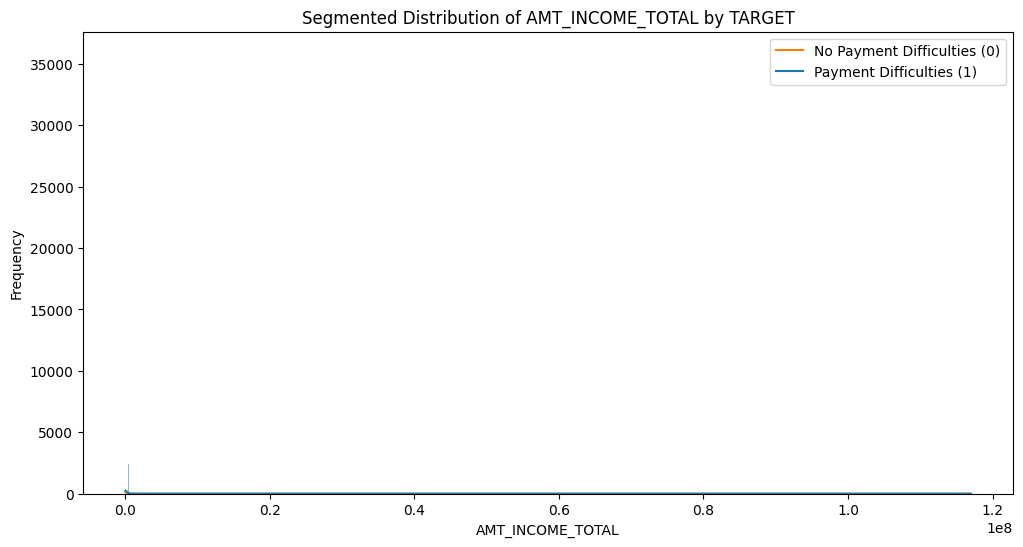

In [77]:
# Example for another variable: 'AMT_INCOME_TOTAL'

plt.figure(figsize=(12, 6))
sns.histplot(data=application_data_cleaned, x='AMT_INCOME_TOTAL', hue='TARGET', kde=True, multiple='stack')
plt.title('Segmented Distribution of AMT_INCOME_TOTAL by TARGET')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.legend(['No Payment Difficulties (0)', 'Payment Difficulties (1)'])
plt.show()


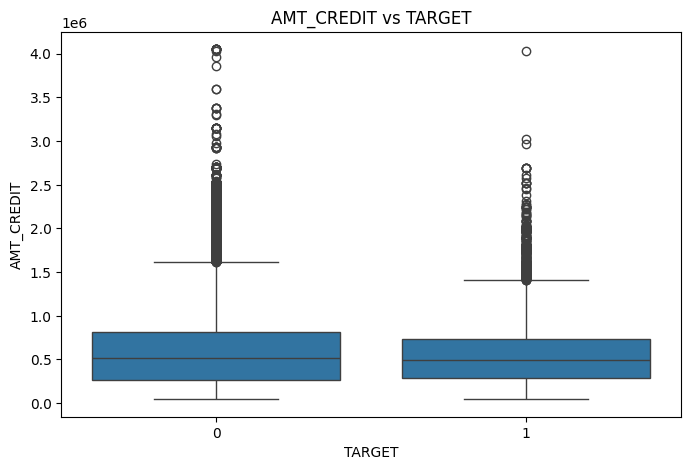

In [78]:
# Bivariate analysis: Relationship between 'AMT_CREDIT' and 'TARGET'

plt.figure(figsize=(8, 5))
sns.boxplot(data=application_data_cleaned, x='TARGET', y='AMT_CREDIT')
plt.title('AMT_CREDIT vs TARGET')
plt.xlabel('TARGET')
plt.ylabel('AMT_CREDIT')
plt.show()

In [79]:
# Merging Application and Prev Application

merged_data = pd.merge(application_data_cleaned, prev_application_data_cleaned, on='SK_ID_CURR', how='inner')

print(f"Merged Data Shape: {merged_data.shape}")

print(tabulate(merged_data.sample(10), headers='keys', tablefmt='grid'))

Merged Data Shape: (1413701, 85)
+---------+--------------+----------+------------------------+---------------+----------------+-------------------+----------------+--------------------+----------------+-----------------+---------------------+---------------------+----------------------+-------------------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+--------------+------------------+-------------------+--------------------+--------------+--------------+----------------------+-------------------+------------------------+-------------------------------+--------------------------------+-----------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+------------------------+----------------+----------------+--------------------------

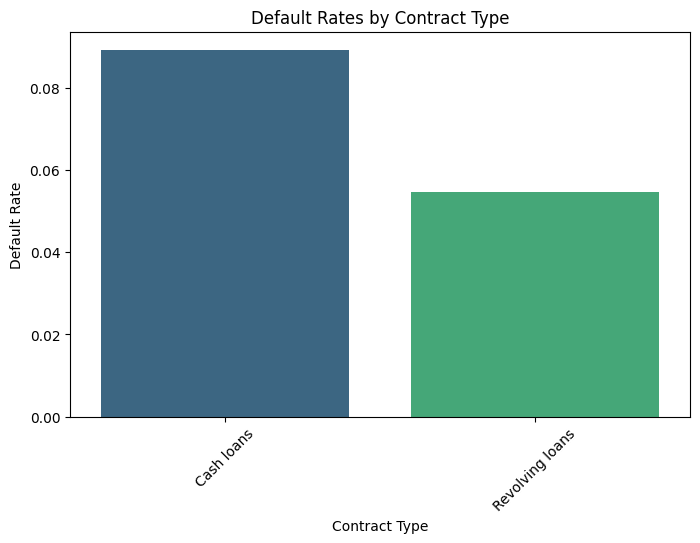

Default Rates by Contract Type:
NAME_CONTRACT_TYPE_x
Cash loans         0.089150
Revolving loans    0.054707
Name: TARGET, dtype: float64


In [80]:
# To analyze the default rates for each contract type and understand which contract types have higher default rates.

contract_type_default = merged_data.groupby('NAME_CONTRACT_TYPE_x')['TARGET'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=contract_type_default.index, y=contract_type_default.values, palette='viridis', hue=contract_type_default.index, legend=False)
plt.title('Default Rates by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

print("Default Rates by Contract Type:")
print(contract_type_default)

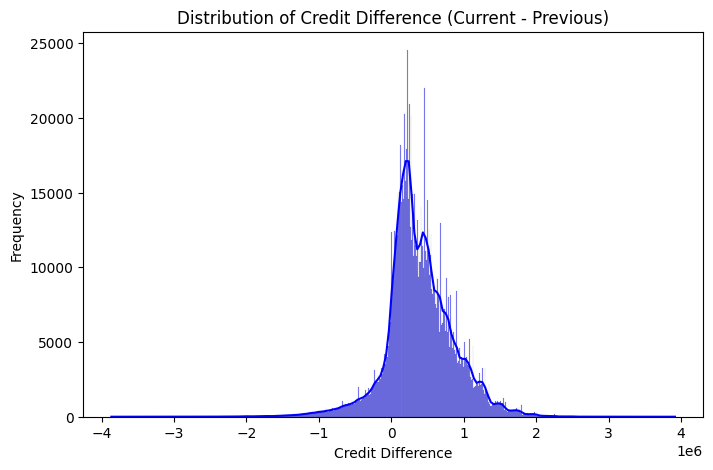

In [81]:
# Insight: Average Credit Difference (Current vs. Previous Loan Amount)

# To calculate the average difference between the current loan amount (AMT_CREDIT_x) and the previous loan amount (AMT_CREDIT_y). This will help us understand if there is a significant increase or decrease in loan amounts over time.

merged_data['CREDIT_DIFF'] = merged_data['AMT_CREDIT_x'] - merged_data['AMT_CREDIT_y']

avg_credit_diff = merged_data['CREDIT_DIFF'].mean()

plt.figure(figsize=(8, 5))
sns.histplot(merged_data['CREDIT_DIFF'], kde=True, color='blue')
plt.title('Distribution of Credit Difference (Current - Previous)')
plt.xlabel('Credit Difference')
plt.ylabel('Frequency')
plt.show()

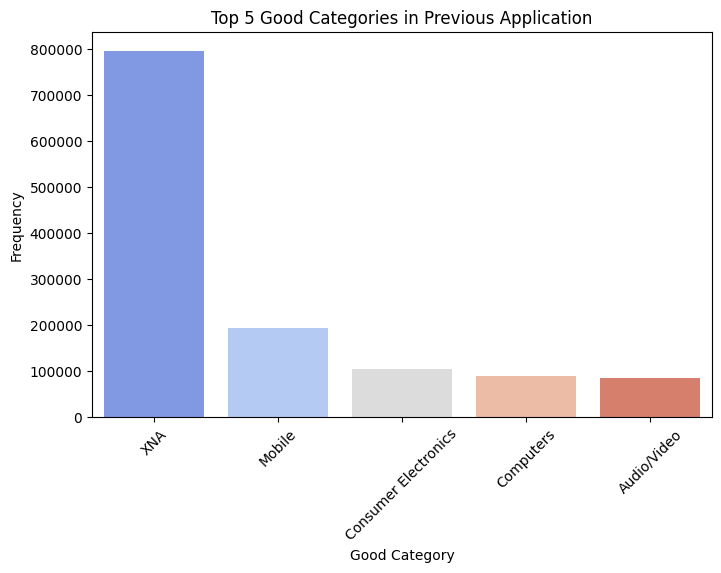

Top 5 Goods Categories in Previous Applications:
NAME_GOODS_CATEGORY
XNA                     797209
Mobile                  193743
Consumer Electronics    104785
Computers                89923
Audio/Video              85502
Name: count, dtype: int64


In [82]:
# Insight: Top Goods Categories in Previous Applications

# To find the most common goods categories (NAME_GOODS_CATEGORY) in previous loan applications. This will give us an understanding of consumer preferences.

# Most common 5
top_goods = merged_data['NAME_GOODS_CATEGORY'].value_counts().head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_goods.index, y=top_goods.values, palette='coolwarm', hue=top_goods.index, legend=False)
plt.title('Top 5 Good Categories in Previous Application')
plt.xlabel('Good Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

print("Top 5 Goods Categories in Previous Applications:")
print(top_goods)

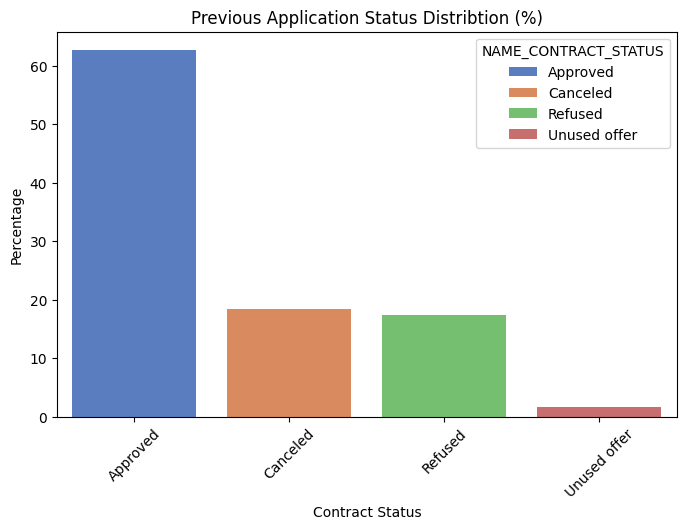

Previous Application Status Distribution (%):
NAME_CONTRACT_STATUS
Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: proportion, dtype: float64


In [83]:
# Insight: Payment Behavior by Previous Application Status

# To analyze the distribution of previous application statuses (NAME_CONTRACT_STATUS). This will help us understand how payment behavior (approval, rejection, etc.) correlates with loan defaults.

payment_behavior = merged_data['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=payment_behavior.index, y=payment_behavior.values, palette='muted', hue=payment_behavior.index, legend=True)
plt.title('Previous Application Status Distribtion (%)')
plt.xlabel('Contract Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

print("Previous Application Status Distribution (%):")
print(payment_behavior)

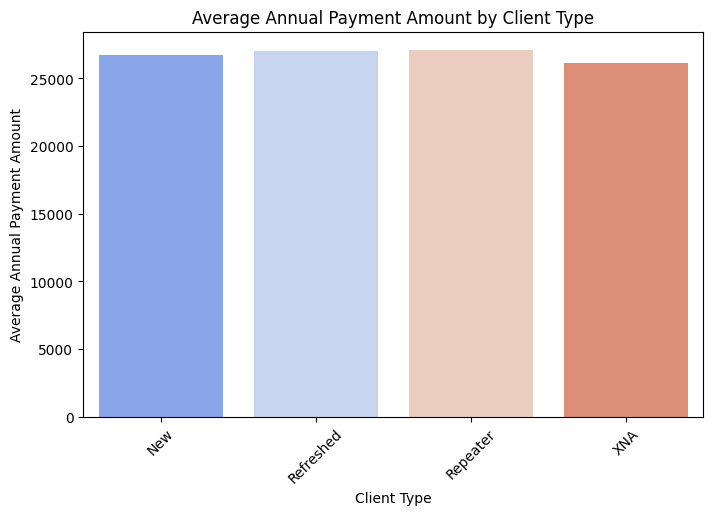

Average Annual Payment Amount by Client Type:
NAME_CLIENT_TYPE
New          26685.180839
Refreshed    27039.707559
Repeater     27098.641295
XNA          26121.403435
Name: AMT_ANNUITY_x, dtype: float64


In [84]:
# Insight: Average Annual Payment Amount by Client Type

# To evaluate the average annual payment amount (AMT_ANNUITY_x) across different client types (NAME_CLIENT_TYPE).
# This will help us understand the relationship between client type and their financial behavior.

avg_annual_payment = merged_data.groupby('NAME_CLIENT_TYPE')['AMT_ANNUITY_x'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_annual_payment.index, y=avg_annual_payment.values, palette='coolwarm', hue=avg_annual_payment.index, legend=False)
plt.title('Average Annual Payment Amount by Client Type')
plt.xlabel('Client Type')
plt.ylabel('Average Annual Payment Amount')
plt.xticks(rotation=45)
plt.show()

print("Average Annual Payment Amount by Client Type:")
print(avg_annual_payment)


# **Summary and Recommendations**

### **Data Quality and Completeness**
The analysis highlighted several issues with data quality and completeness. Numerous columns, such as `APARTMENTS_MODE` and `FLOORSMAX_MODE`, contain a high percentage of missing values, which undermines their reliability for analysis. Additionally, redundant columns like `FLAG_DOCUMENT_*` contribute little value to the analysis and clutter the dataset. Addressing these issues is essential to improve the dataset's utility and predictive potential.

### **Key Predictive Insights**
Variables such as `AMT_CREDIT`, `DAYS_EMPLOYED`, and `AMT_INCOME_TOTAL` emerged as strong predictors of loan repayment risk. Clients with higher incomes tend to have a lower probability of default, while larger loan amounts increase default risk. Employment duration was also found to correlate positively with repayment capability, emphasizing the role of job stability in creditworthiness.

### **Target Variable Imbalance**
The dataset exhibits a significant imbalance in the target variable, with most clients having no payment difficulties. This imbalance can bias predictive models, leading to skewed results. Techniques such as oversampling or class weighting are necessary to ensure balanced and accurate predictions.

### **Segmented Behavioral Trends**
Distinct patterns were observed when comparing clients with and without payment difficulties. For instance, defaulting clients tend to have lower income levels and higher loan amounts. These segmented trends provide valuable insights into risk profiling and customer segmentation for tailored interventions.

---

# **Recommendations**

### **Feature Optimization**
To streamline the analysis and improve model performance, remove low-impact columns such as `APARTMENTS_MODE`, `FLOORSMAX_MODE`, `WALLSMATERIAL_MODE`, and `FLAG_DOCUMENT_*`. Focus on key predictors like `AMT_CREDIT`, `DAYS_EMPLOYED`, and `AMT_INCOME_TOTAL` to enhance model accuracy.

### **Missing Value Handling**
Implement targeted strategies to address missing data. For critical variables, use imputation techniques such as mean or predictive imputation. Columns with excessive missing values should be excluded from the analysis to prevent data noise.

### **Addressing Class Imbalance**
Adopt advanced techniques like SMOTE (Synthetic Minority Oversampling Technique) or cost-sensitive learning to handle the target variable's imbalance. These approaches will ensure fair and reliable predictions for both defaulting and non-defaulting clients.

### **Risk-Based Loan Structuring**
Incorporate insights into dynamic loan pricing and approval criteria. Clients with higher income stability and longer employment histories should be prioritized, while high-risk applicants should undergo stricter credit checks. Tailored loan products for low-income groups with smaller amounts and shorter repayment periods can mitigate default risks.

### **Customer Engagement and Education**
Develop financial literacy programs targeting high-risk segments to promote responsible borrowing and repayment practices. Educating clients on managing their financial obligations can significantly reduce default rates.

---

